In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset_2025-05-04T10_29_54.820004413Z_DEFAULT_INTEGRATION_IMF.STA_ITG_4.0.0.csv',low_memory=False)
df.head()

,DATASET,SERIES_CODE,OBS_MEASURE,COUNTRY,INDICATOR,TYPE_OF_TRANSFORMATION,FREQUENCY,SCALE,PRECISION,DECIMALS_DISPLAYED,...,2024-M06,2024-Q3,2024-M07,2024-M08,2024-M09,2024-Q4,2024-M10,2024-M11,2024-M12,2025-M01
0,IMF.STA:ITG(4.0.0),BOL.XG_VI.FOB_IX.Q,OBS_VALUE,Bolivia,"Exports of goods, Volume index","Free on board (FOB), Index",Quarterly,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IMF.STA:ITG(4.0.0),ITA.MG_VI.CIF_IX.Q,OBS_VALUE,Italy,"Imports of goods, Volume index","Cost insurance freight (CIF), Index",Quarterly,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IMF.STA:ITG(4.0.0),SLB.XG_PD.FOB_IX.Q,OBS_VALUE,Solomon Islands,"Exports of goods, Price deflator","Free on board (FOB), Index",Quarterly,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IMF.STA:ITG(4.0.0),PHL.XG_PD.FOB_IX.Q,OBS_VALUE,Philippines,"Exports of goods, Price deflator","Free on board (FOB), Index",Quarterly,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IMF.STA:ITG(4.0.0),COL.MPI.CIF_IX.Q,OBS_VALUE,Colombia,Import price index,"Cost insurance freight (CIF), Index",Quarterly,Units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns.to_list()

['DATASET',
 'SERIES_CODE',
 'OBS_MEASURE',
 'COUNTRY',
 'INDICATOR',
 'TYPE_OF_TRANSFORMATION',
 'FREQUENCY',
 'SCALE',
 'PRECISION',
 'DECIMALS_DISPLAYED',
 'TR_DIRECTION',
 'TRADE_FLOW',
 'INDEX_TYPE',
 'VALUATION',
 'TRANSFORMATION',
 'UNIT',
 'DERIVATION_TYPE',
 'OVERLAP',
 'IFS_FLAG',
 'REFERENCE_PERIOD',
 'STATUS',
 'DOI',
 'FULL_DESCRIPTION',
 'AUTHOR',
 'PUBLISHER',
 'DEPARTMENT',
 'CONTACT_POINT',
 'TOPIC',
 'TOPIC_DATASET',
 'KEYWORDS',
 'KEYWORDS_DATASET',
 'LANGUAGE',
 'PUBLICATION_DATE',
 'UPDATE_DATE',
 'METHODOLOGY',
 'METHODOLOGY_NOTES',
 'ACCESS_SHARING_LEVEL',
 'ACCESS_SHARING_NOTES',
 'SECURITY_CLASSIFICATION',
 'SOURCE',
 'SHORT_SOURCE_CITATION',
 'FULL_SOURCE_CITATION',
 'LICENSE',
 'SUGGESTED_CITATION',
 'KEY_INDICATOR',
 'SERIES_NAME',
 '1948',
 '1948-Q1',
 '1948-M01',
 '1948-M02',
 '1948-M03',
 '1948-Q2',
 '1948-M04',
 '1948-M05',
 '1948-M06',
 '1948-Q3',
 '1948-M07',
 '1948-M08',
 '1948-M09',
 '1948-Q4',
 '1948-M10',
 '1948-M11',
 '1948-M12',
 '1949',
 '1949-Q

In [4]:
df['COUNTRY'] = 'Russian Federation'
df = df.melt(
    id_vars=['COUNTRY', 'TRADE_FLOW', 'VALUATION', 'INDICATOR'],
    var_name='YEAR',
    value_name='TRADE_AMOUNT_USD'
)
df

,COUNTRY,TRADE_FLOW,VALUATION,INDICATOR,YEAR,TRADE_AMOUNT_USD
0,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Volume index",DATASET,IMF.STA:ITG(4.0.0)
1,Russian Federation,Imports of goods,Cost insurance freight (CIF),"Imports of goods, Volume index",DATASET,IMF.STA:ITG(4.0.0)
2,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Price deflator",DATASET,IMF.STA:ITG(4.0.0)
3,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Price deflator",DATASET,IMF.STA:ITG(4.0.0)
4,Russian Federation,NaN,Cost insurance freight (CIF),Import price index,DATASET,IMF.STA:ITG(4.0.0)
...,...,...,...,...,...,...
7422475,Russian Federation,Imports of goods,Free on board (FOB),Imports of goods,2025-M01,NaN
7422476,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,2025-M01,NaN
7422477,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Volume index",2025-M01,NaN
7422478,Russian Federation,Imports of goods,Cost insurance freight (CIF),"Imports of goods, Volume index",2025-M01,NaN


In [5]:
df = df.drop(df[((df['YEAR'] == 'TRADE_VALUE') | (df['YEAR'] == 'YEAR') | (df['YEAR'] == 'DATASET')) & ((df['TRADE_AMOUNT_USD'] == 'TRADE_VALUE') | (df['TRADE_AMOUNT_USD'] == 'YEAR'))].index)
df = df[df['YEAR'].str.match("^\\d{4}$")]
df['YEAR'] = df['YEAR'].astype(int)
df

,COUNTRY,TRADE_FLOW,VALUATION,INDICATOR,YEAR,TRADE_AMOUNT_USD
230580,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Volume index",1948,NaN
230581,Russian Federation,Imports of goods,Cost insurance freight (CIF),"Imports of goods, Volume index",1948,NaN
230582,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Price deflator",1948,NaN
230583,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Price deflator",1948,NaN
230584,Russian Federation,NaN,Cost insurance freight (CIF),Import price index,1948,NaN
...,...,...,...,...,...,...
7329145,Russian Federation,Imports of goods,Free on board (FOB),Imports of goods,2024,101.129
7329146,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,2024,NaN
7329147,Russian Federation,Exports of goods,Free on board (FOB),"Exports of goods, Volume index",2024,NaN
7329148,Russian Federation,Imports of goods,Cost insurance freight (CIF),"Imports of goods, Volume index",2024,NaN


In [6]:
df = df.dropna(subset=['TRADE_AMOUNT_USD'])
df

,COUNTRY,TRADE_FLOW,VALUATION,INDICATOR,YEAR,TRADE_AMOUNT_USD
233984,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,160.0
233992,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,418.0
233993,Russian Federation,Imports of goods,Cost insurance freight (CIF),Imports of goods,1948,0.363
233994,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,111.0
233996,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,373000.0
...,...,...,...,...,...,...
7329116,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,2024,110.077
7329119,Russian Federation,Imports of goods,Cost insurance freight (CIF),Imports of goods,2024,46893.0
7329124,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,2024,261.853
7329143,Russian Federation,NaN,Free on board (FOB),Export price index (EPI),2024,129.700952


In [7]:
df = df[df['INDICATOR'].isin(['Exports of goods', 'Imports of goods'])]
df

,COUNTRY,TRADE_FLOW,VALUATION,INDICATOR,YEAR,TRADE_AMOUNT_USD
233984,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,160.0
233992,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,418.0
233993,Russian Federation,Imports of goods,Cost insurance freight (CIF),Imports of goods,1948,0.363
233994,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,111.0
233996,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,1948,373000.0
...,...,...,...,...,...,...
7329114,Russian Federation,Imports of goods,Cost insurance freight (CIF),Imports of goods,2024,344.019
7329116,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,2024,110.077
7329119,Russian Federation,Imports of goods,Cost insurance freight (CIF),Imports of goods,2024,46893.0
7329124,Russian Federation,Exports of goods,Free on board (FOB),Exports of goods,2024,261.853


In [10]:
df = df.groupby(['YEAR', 'TRADE_FLOW'])['TRADE_AMOUNT_USD'].sum().reset_index()
df

,YEAR,TRADE_FLOW,TRADE_AMOUNT_USD
0,2010,Exports of goods,89294015573.272858
1,2010,Imports of goods,129997342523.148727
2,2011,Exports of goods,121172926502.318405
3,2011,Imports of goods,166608926392.481262
4,2012,Exports of goods,120963755541.462494
5,2012,Imports of goods,158556344076.843292
6,2013,Exports of goods,97690660425.512207
7,2013,Imports of goods,150345530015.406281
8,2014,Exports of goods,111206803367.999634
9,2014,Imports of goods,164252422623.572021


<Axes: xlabel='YEAR', ylabel='TRADE_AMOUNT_USD'>

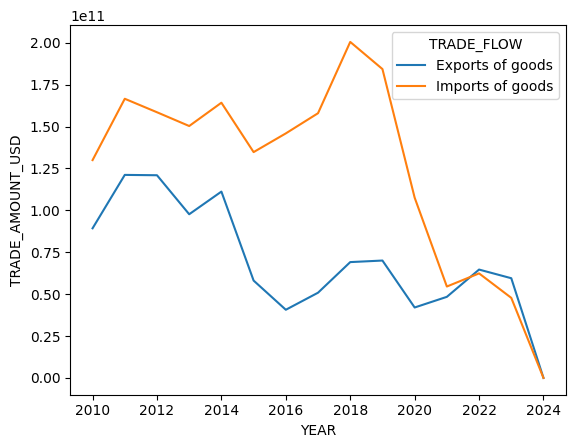

In [11]:
sns.lineplot(data=df,x='YEAR',y='TRADE_AMOUNT_USD',hue='TRADE_FLOW')

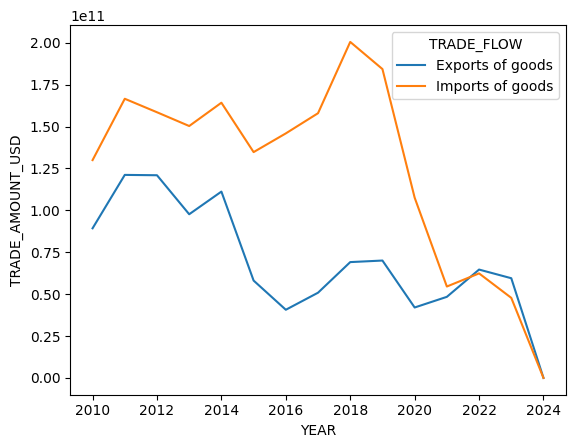

In [12]:
df = df[df['YEAR']>=2010]
sns.lineplot(data=df,x='YEAR',y='TRADE_AMOUNT_USD',hue='TRADE_FLOW');